In [1]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# --- Load the Dataset ---
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
# --- Exploratory Data Analysis (EDA) ---
print(df.head())
print(df.info())
print(df.describe())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
         

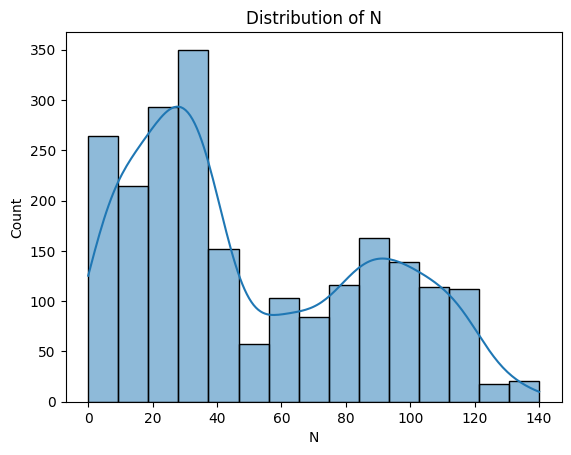

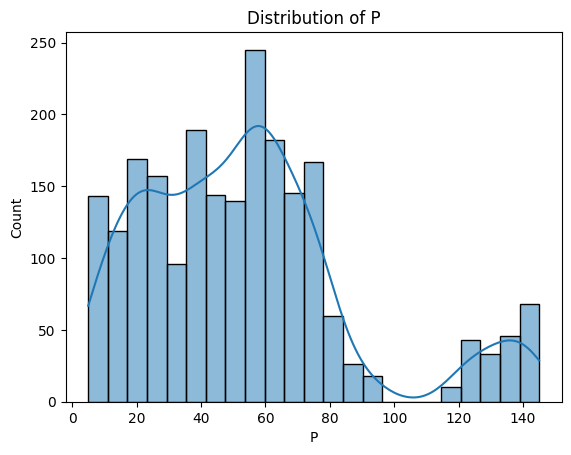

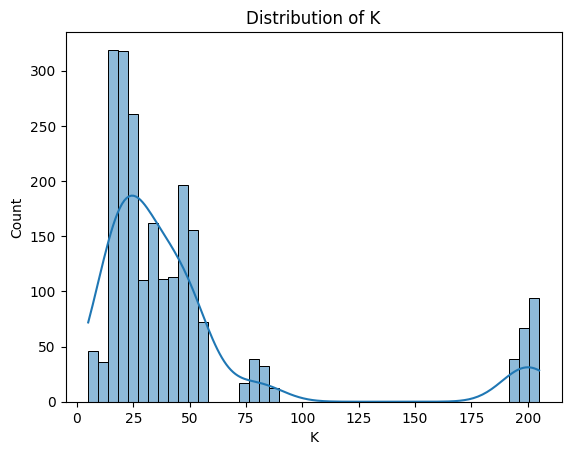

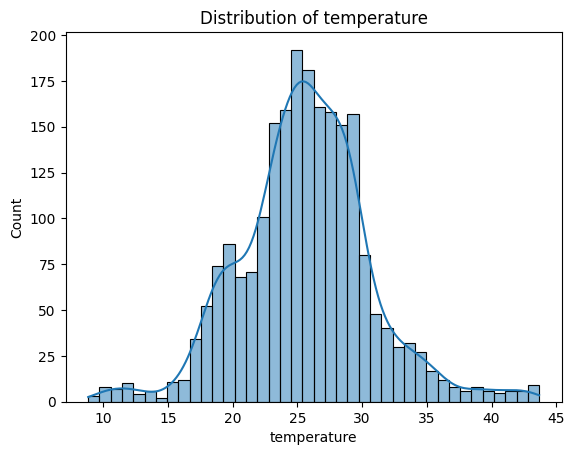

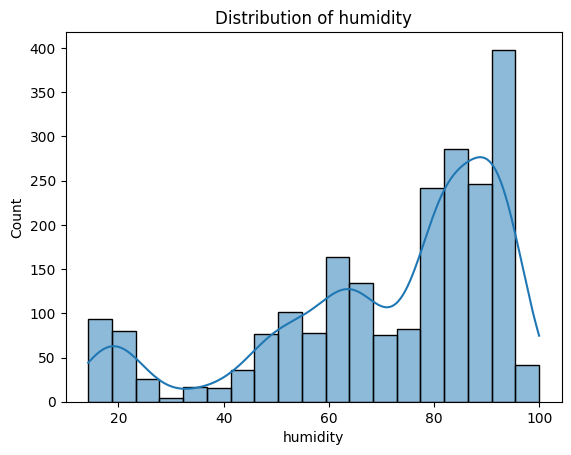

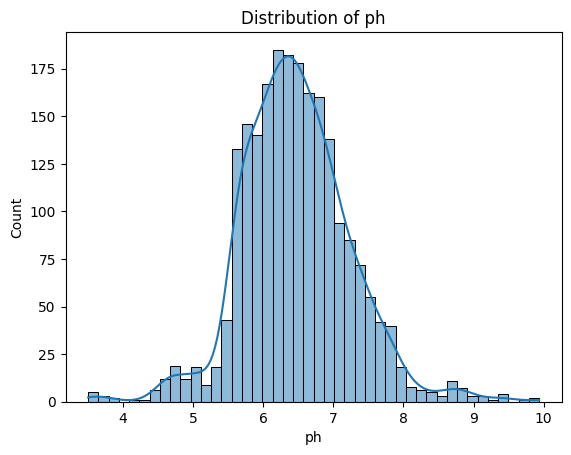

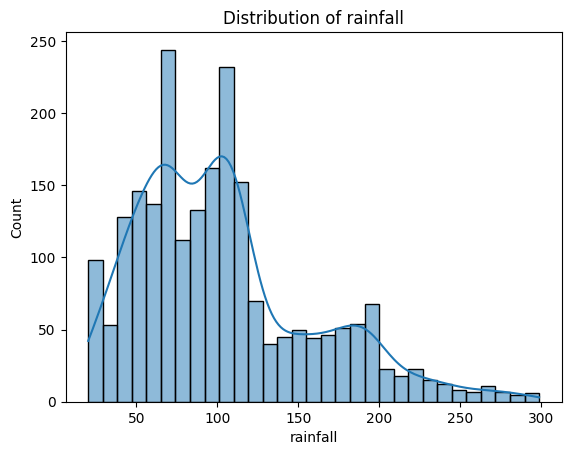

In [4]:
# Visualize distributions
for col in df.columns[:-1]: #Excluding the target variable
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


--- Correlation Matrix ---


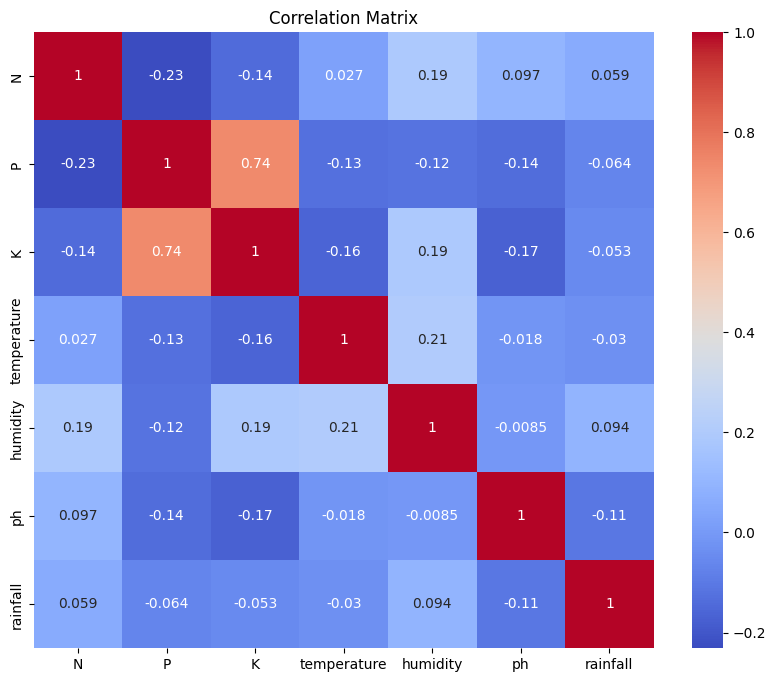

In [6]:
# Visualize correlation (numeric columns only)
print("\n--- Correlation Matrix ---")
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
# --- Data Preprocessing ---
# (Handle missing values, outliers, etc., if needed)
# In this dataset, there are no missing values based on the .info() output.

# --- Feature and Target Variables ---
X = df.drop('label', axis=1)
y = df['label']

In [8]:
# --- Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# --- Model Training (Random Forest Classifier) ---
print("\n--- Model Training ---")
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


--- Model Training ---


RandomForestClassifier(random_state=42)

In [10]:
# --- Model Evaluation ---
print("\n--- Model Evaluation ---")
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))



--- Model Evaluation ---
Accuracy: 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
 


--- Feature Importance ---


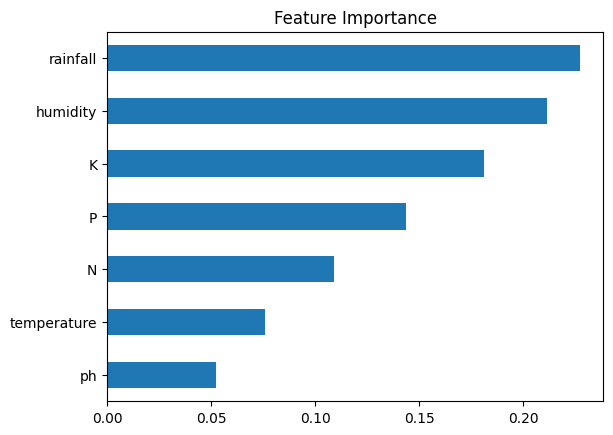

In [11]:
# --- Feature Importance ---
print("\n--- Feature Importance ---")
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(inplace=True)
feature_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.show()


In [15]:
# --- Making Predictions ---
print("\n--- Making Predictions ---")

# Example 1:
example_data = pd.DataFrame([[90, 42, 43, 20.87, 82.00, 6.50, 202.93]], columns=X.columns)
prediction = model.predict(example_data)
print(f"The recommended crop is: {prediction[0]}")

# Example 2:
example_data2 = pd.DataFrame([[83, 45, 60, 28, 70.3, 7.0, 150.9]], columns=X.columns)
prediction2 = model.predict(example_data2)
print(f"The recommended crop is: {prediction2[0]}")


--- Making Predictions ---
The recommended crop is: rice
The recommended crop is: jute


In [14]:
# --- Conclusion ---
print("\n--- Conclusion ---")
print("This project successfully developed a crop recommendation system using machine learning.")
print("The Random Forest Classifier achieved a high accuracy in predicting suitable crops based on soil and climate data.")
print("Feature importance analysis revealed the key factors influencing crop selection.")
print("This system can be a valuable tool for farmers, enabling them to make informed decisions and optimize their agricultural practices.")
print("Further improvements could involve incorporating more diverse datasets, fine-tuning the model, and deploying it as a user-friendly application.")
print("The goal of this project was to demonstrate the ability to create a functional crop recommendation system. The next steps would be to improve the model, and to deploy it.")


--- Conclusion ---
This project successfully developed a crop recommendation system using machine learning.
The Random Forest Classifier achieved a high accuracy in predicting suitable crops based on soil and climate data.
Feature importance analysis revealed the key factors influencing crop selection.
This system can be a valuable tool for farmers, enabling them to make informed decisions and optimize their agricultural practices.
Further improvements could involve incorporating more diverse datasets, fine-tuning the model, and deploying it as a user-friendly application.
The goal of this project was to demonstrate the ability to create a functional crop recommendation system. The next steps would be to improve the model, and to deploy it.
